Constructing a correct spelling detector using two corpuses (movie_reviews and IMDB reviews dataset)
In this notebook, there are functions written to find words with Minimum edit distance = 1 and 2. (Note: MED = 3 function takes a lot of time to run so it has not been used)
With all the words returned from the function, the words are checked if they exist in the vocabulary of the corpus. If exists, we predict the probability of that word occuring and the correct word according to the corpus.




Run the last cell:
Give a input word
If it's correct, it returns it's already correctly spelt.
else, it return's the nearest senseful word with their probabilities


Note: Some cells might take long time to run.

In [267]:
import nltk
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import string
import pandas as pd


In [268]:
from nltk.corpus import movie_reviews

In [269]:
all_reviews = []

for fid in movie_reviews.fileids():
    all_reviews.append(movie_reviews.words(fid))
    
    

In [270]:
#In this dataset, we have a total of 2000 reviews regardless of their class.
len(all_reviews)

2000

We can add all the words to a vocabulary list and remove the duplicates

In [271]:
punctuations =list(string.punctuation)

In [272]:
vocabulary = []

for review in all_reviews:
    for word in review:
        if word not in punctuations:
            vocabulary.append(word)
    
    

In [273]:
print("There are a total of " + str(len(vocabulary)) + " words in the dataset")

There are a total of 1338789 words in the dataset


In [274]:
word_counts = Counter(vocabulary)
word_counts["fortune"]

48

In [275]:
word_counts[","]

0

# Heaps Law

V(n) = k * n^β  
log V(n) = β * log(n) + k

In [276]:
x = [2000,4000,6000,8000,10000]
word_2000 = []
word_4000 = []
word_6000 = []
word_8000 = []
word_10000 = []

for i in range(2000):
    n = random.randint(0,len(vocabulary))
    word_2000.append(vocabulary[n])
    

for i in range(4000):
    n = random.randint(0,len(vocabulary))
    word_4000.append(vocabulary[n])

    
for i in range(6000):
    n = random.randint(0,len(vocabulary))
    word_6000.append(vocabulary[n])
    
for i in range(8000):
    n = random.randint(0,len(vocabulary))
    word_8000.append(vocabulary[n])
    
for i in range(10000):
    n = random.randint(0,len(vocabulary))
    word_10000.append(vocabulary[n])

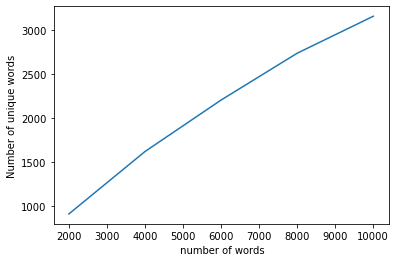

In [277]:
y = []

y.append(len(np.unique(word_2000)))
y.append(len(np.unique(word_4000)))
y.append(len(np.unique(word_6000)))
y.append(len(np.unique(word_8000)))
y.append(len(np.unique(word_10000)))
plt.plot(x,y)
plt.xlabel(" number of words")
plt.ylabel("Number of unique words")
plt.show()

In [278]:
print("Total number of words ->",2000,4000)

temp_words1 = np.unique(word_2000)
temp_words2 = np.unique(word_4000)

lenunique1 = len(temp_words1)
lenunique2 = len(temp_words2)

print("Unique words ->" ,len(temp_words1), len(temp_words2))

Total number of words -> 2000 4000
Unique words -> 910 1619


In [279]:
beta = (math.log(lenunique2) - math.log(lenunique1)) / (math.log(4000) - math.log(2000))
beta

0.8311645352165077

In [280]:
K = math.log(lenunique1) - ( beta * math.log(2000))
print(K)

0.4958440394995911


In [281]:
unique_words_heap = K* (len(unique_words)**beta)

unique_words_heap

3296.416041126526

In [282]:
len(np.unique(word_10000))

3156

As we can see from above, heaps law. The number of unique words using heaps law is almost equivalent to the original number of unique words in the corpus.  We can say that the corpus follows heap's law

Finding the unique words in the dataset

In [283]:
#This function will return the unique words in the vocabulary list

def getUniqueWords(allWords) :
    uniqueWords = [] 
    for i in allWords:
        if not i in uniqueWords:
            uniqueWords.append(i)
    return uniqueWords



In [284]:
unique_words = getUniqueWords(vocabulary)

In [285]:
print("There are a total number of " +str(len(unique_words)) + " unique words in the unique words list")

There are a total number of 39738 unique words in the unique words list


Checking if unique_words list has any duplicates

In [286]:
temporary_checker = Counter(unique_words)
print(temporary_checker[","])
print(temporary_checker["the"])
# we can see that the most common words don't have duplicates so this unique words list is has unique entries.

0
1


In [287]:
#In the split function, we split the words into different lengths in two parts

def split(word):
    split_arr = []
    
    for i in range(len(word)+1):
        split_arr.append([word[:i],word[i:]])

    return split_arr


#We delete single letters from word at different instances
def delete(word):
    return [l+r[1:] for l,r in split(word) if r]

#We swap the words with adjacent words in this function.
def swap(word):
    return [l+r[1] + r[0] + r[2:] for l,r in split(word) if len(r)>1]

#we replace different letters with different letters from all the alphabets.

def replace(word):
    letters = string.ascii_lowercase
    return [l+c+r[1:] for l,r in split(word) if r for c in letters]

#We insert alphabets at different position to create new words.
def insert(word):
    letters = string.ascii_lowercase
    return [l+c+r for l,r in split(word) for c in letters]

#Minimum edit distance one function
def edit_one(word):
    return set(delete(word) + swap(word) + replace(word) + insert(word))

#Minimum edit distance two function

def edit_two(word):
    return set (e2 for e1 in edit_one(word) for e2 in edit_one(e1))

#Minimum edit distance three function. (Note: This function has not been used in our spelling corrector as this function takes a lot of time to compile)
def edit_three(word):
    return set (e2 for e1 in edit_two(word) for e2 in edit_two(e1))

Showing examples of how each function works with words

In [288]:
print(split("Than"))

[['', 'Than'], ['T', 'han'], ['Th', 'an'], ['Tha', 'n'], ['Than', '']]


In [289]:
print(delete("Than"))

['han', 'Tan', 'Thn', 'Tha']


In [290]:
print(swap("Than"))

['hTan', 'Tahn', 'Thna']


In [291]:
print(replace("Than"))

['ahan', 'bhan', 'chan', 'dhan', 'ehan', 'fhan', 'ghan', 'hhan', 'ihan', 'jhan', 'khan', 'lhan', 'mhan', 'nhan', 'ohan', 'phan', 'qhan', 'rhan', 'shan', 'than', 'uhan', 'vhan', 'whan', 'xhan', 'yhan', 'zhan', 'Taan', 'Tban', 'Tcan', 'Tdan', 'Tean', 'Tfan', 'Tgan', 'Than', 'Tian', 'Tjan', 'Tkan', 'Tlan', 'Tman', 'Tnan', 'Toan', 'Tpan', 'Tqan', 'Tran', 'Tsan', 'Ttan', 'Tuan', 'Tvan', 'Twan', 'Txan', 'Tyan', 'Tzan', 'Than', 'Thbn', 'Thcn', 'Thdn', 'Then', 'Thfn', 'Thgn', 'Thhn', 'Thin', 'Thjn', 'Thkn', 'Thln', 'Thmn', 'Thnn', 'Thon', 'Thpn', 'Thqn', 'Thrn', 'Thsn', 'Thtn', 'Thun', 'Thvn', 'Thwn', 'Thxn', 'Thyn', 'Thzn', 'Thaa', 'Thab', 'Thac', 'Thad', 'Thae', 'Thaf', 'Thag', 'Thah', 'Thai', 'Thaj', 'Thak', 'Thal', 'Tham', 'Than', 'Thao', 'Thap', 'Thaq', 'Thar', 'Thas', 'That', 'Thau', 'Thav', 'Thaw', 'Thax', 'Thay', 'Thaz']


In [292]:
print(edit_one("Than"))

{'fThan', 'Thian', 'Thran', 'iThan', 'tThan', 'Tsan', 'Thsn', 'Thzn', 'mhan', 'Thaz', 'fhan', 'Tchan', 'Thn', 'Thagn', 'Thzan', 'Thjan', 'Thaq', 'Tan', 'phan', 'aThan', 'Thban', 'Thun', 'Thln', 'Thamn', 'Tkan', 'Thon', 'Thad', 'Tghan', 'Thanx', 'Tean', 'Thanu', 'Tvan', 'Txhan', 'Thaxn', 'Thanw', 'Thane', 'Thcn', 'Thanr', 'xThan', 'Tran', 'Thadn', 'Tham', 'Ttan', 'Thtn', 'Thas', 'Tbhan', 'Thavn', 'wThan', 'ohan', 'Tvhan', 'Thant', 'hTan', 'Thacn', 'Taan', 'qhan', 'Twan', 'Tahn', 'vhan', 'dThan', 'hhan', 'ehan', 'Tdan', 'Thah', 'Tnhan', 'Thwan', 'Thxan', 'Tqan', 'Thfan', 'nThan', 'Thcan', 'Thman', 'Thaln', 'Thanq', 'Tyan', 'Thwn', 'nhan', 'Tnan', 'than', 'Thaa', 'Thmn', 'Thaan', 'Thna', 'Thazn', 'zThan', 'jhan', 'Tlan', 'ihan', 'Thpn', 'Thac', 'Tcan', 'eThan', 'Thyan', 'Thqan', 'Thanz', 'Tihan', 'Toan', 'dhan', 'Thang', 'Thahn', 'Thaf', 'Thae', 'bThan', 'ahan', 'Tpan', 'Tmhan', 'Tshan', 'Thpan', 'Thin', 'Tjhan', 'Thann', 'Tuan', 'Thgn', 'Thans', 'Thqn', 'bhan', 'Thabn', 'yhan', 'lThan', 

In [293]:
print(edit_two("Than"))

{'Thjaln', 'Tlanf', 'tTohan', 'chzan', 'Thsanb', 'Thpag', 'Thxfan', 'Thzny', 'Thfrn', 'ihanx', 'Tthen', 'Thkap', 'Thenz', 'Ttin', 'Tbhax', 'Thanmj', 'oThyn', 'Tsean', 'Thahgn', 'Thznp', 'Tthzan', 'chTan', 'Thsanm', 'Thwi', 'bchan', 'Tjhman', 'tTharn', 'bThaq', 'Thlain', 'Thgzn', 'asan', 'Twhzn', 'Thpapn', 'ohaqn', 'Tihanc', 'Thaenq', 'fTuhan', 'Thcw', 'Thrban', 'Thcnd', 'Tjhaun', 'Tpan', 'Tybn', 'Thalxn', 'Tfani', 'Thavp', 'gjhan', 'Thgn', 'aThajn', 'Tnanm', 'Thwnp', 'iThgan', 'Thus', 'hann', 'xThayn', 'Thare', 'Tphann', 'Thlay', 'bhgan', 'Tharen', 'Theman', 'Txant', 'axhan', 'qhac', 'Thaqln', 'Tden', 'Thmr', 'Tahanz', 'Theajn', 'Tlagn', 'lTsan', 'Thansr', 'Thasm', 'Tihn', 'Thdpn', 'Thyrn', 'yTman', 'Tyam', 'dhanf', 'Tehaon', 'Tuhon', 'Tdhana', 'Thasf', 'bThanc', 'Thjban', 'Tharwn', 'fThano', 'Thvanc', 'Tzhanq', 'eThtan', 'ahanr', 'thean', 'Tghanv', 'zThfan', 'Tdhhn', 'euThan', 'Thbac', 'exhan', 'Thbnu', 'Tlhxn', 'Thsai', 'Tlhsn', 'Thasa', 'pTvan', 'Tjhqan', 'cmhan', 'Thgnh', 'Tuhak', 

Finding the probability of occurence of words in the whole dataset

In [294]:
total_word_count = float(sum(word_counts.values()))
word_P = {word: word_counts[word] / total_word_count for word in word_counts.keys()}


In [295]:
print(word_P["fortune"])

3.5853297270891826e-05


In [296]:
print(word_P["the"])

0.05716285389258501


# Top 50 Collocations

The habitual juxtaposition of a particular word with another word or words with a frequency greater than chance

In [297]:
sorted_wordP = sorted(word_P.items(), key = lambda x:x[1])

top_50_collocations = dict(sorted_wordP[len(sorted_wordP)-50:])

In [298]:
def reverse(lst):
    new_lst = lst[::-1]
    return new_lst

In [299]:
x = []
y = []

x = list((top_50_collocations.keys()))
y = list((top_50_collocations.values()))

x = reverse(x)
y = reverse(y)

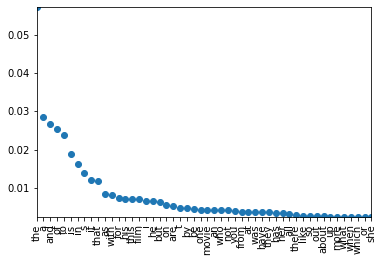

In [300]:
plt.plot(x,y,"o")
# plt.figure(figsize = (10,10))
plt.xticks(x,rotation = 'vertical')
plt.margins(0.00001)
plt.subplots_adjust(bottom = 0.15)
plt.show()



# Word predictor

In [301]:
def word_predictor(all_doc_words,vocabulary, word_P):
    if word in vocabulary:
        print(word,"is already correctly spelt")
        return
    else:
        suggestions = edit_one(all_doc_words) or edit_two(all_doc_words) or [all_doc_words]
        best_guesses = [w for w in suggestions if w in vocabulary and len(w)!=1]
        return [(w,word_P[w]) for w in best_guesses]
        
     
        

In [302]:
word = "so"
guesses = word_predictor(word,vocabulary, word_P)

so is already correctly spelt


In [303]:
print(guesses)

None


The function below returns the n-grams dependent on the number given as the input

In [304]:
def generate_ngrams(all_doc_words, n):
    output = []
    for i in range(len(all_doc_words) - n+1):
        output.append(all_doc_words[i:i+n])
    return output

All bigrams in the movie_review dataset

In [305]:
bigrams = []
for review in all_reviews:
    bigrams.append(generate_ngrams(review,2))

print(bigrams[0])


[['plot', ':'], [':', 'two'], ['two', 'teen'], ['teen', 'couples'], ['couples', 'go'], ['go', 'to'], ['to', 'a'], ['a', 'church'], ['church', 'party'], ['party', ','], [',', 'drink'], ['drink', 'and'], ['and', 'then'], ['then', 'drive'], ['drive', '.'], ['.', 'they'], ['they', 'get'], ['get', 'into'], ['into', 'an'], ['an', 'accident'], ['accident', '.'], ['.', 'one'], ['one', 'of'], ['of', 'the'], ['the', 'guys'], ['guys', 'dies'], ['dies', ','], [',', 'but'], ['but', 'his'], ['his', 'girlfriend'], ['girlfriend', 'continues'], ['continues', 'to'], ['to', 'see'], ['see', 'him'], ['him', 'in'], ['in', 'her'], ['her', 'life'], ['life', ','], [',', 'and'], ['and', 'has'], ['has', 'nightmares'], ['nightmares', '.'], ['.', 'what'], ['what', "'"], ["'", 's'], ['s', 'the'], ['the', 'deal'], ['deal', '?'], ['?', 'watch'], ['watch', 'the'], ['the', 'movie'], ['movie', 'and'], ['and', '"'], ['"', 'sorta'], ['sorta', '"'], ['"', 'find'], ['find', 'out'], ['out', '.'], ['.', '.'], ['.', '.'], ['.'

All trigrams in the movie_review dataset

In [306]:
trigrams = []
for review in all_reviews:
    trigrams.append(generate_ngrams(review,3))
print(trigrams[0])

[['plot', ':', 'two'], [':', 'two', 'teen'], ['two', 'teen', 'couples'], ['teen', 'couples', 'go'], ['couples', 'go', 'to'], ['go', 'to', 'a'], ['to', 'a', 'church'], ['a', 'church', 'party'], ['church', 'party', ','], ['party', ',', 'drink'], [',', 'drink', 'and'], ['drink', 'and', 'then'], ['and', 'then', 'drive'], ['then', 'drive', '.'], ['drive', '.', 'they'], ['.', 'they', 'get'], ['they', 'get', 'into'], ['get', 'into', 'an'], ['into', 'an', 'accident'], ['an', 'accident', '.'], ['accident', '.', 'one'], ['.', 'one', 'of'], ['one', 'of', 'the'], ['of', 'the', 'guys'], ['the', 'guys', 'dies'], ['guys', 'dies', ','], ['dies', ',', 'but'], [',', 'but', 'his'], ['but', 'his', 'girlfriend'], ['his', 'girlfriend', 'continues'], ['girlfriend', 'continues', 'to'], ['continues', 'to', 'see'], ['to', 'see', 'him'], ['see', 'him', 'in'], ['him', 'in', 'her'], ['in', 'her', 'life'], ['her', 'life', ','], ['life', ',', 'and'], [',', 'and', 'has'], ['and', 'has', 'nightmares'], ['has', 'nightm

All 4-grams in the movie review dataset

In [307]:
fourgrams = []
for review in all_reviews:
    fourgrams.append(generate_ngrams(review,4))

print(fourgrams[0])


[['plot', ':', 'two', 'teen'], [':', 'two', 'teen', 'couples'], ['two', 'teen', 'couples', 'go'], ['teen', 'couples', 'go', 'to'], ['couples', 'go', 'to', 'a'], ['go', 'to', 'a', 'church'], ['to', 'a', 'church', 'party'], ['a', 'church', 'party', ','], ['church', 'party', ',', 'drink'], ['party', ',', 'drink', 'and'], [',', 'drink', 'and', 'then'], ['drink', 'and', 'then', 'drive'], ['and', 'then', 'drive', '.'], ['then', 'drive', '.', 'they'], ['drive', '.', 'they', 'get'], ['.', 'they', 'get', 'into'], ['they', 'get', 'into', 'an'], ['get', 'into', 'an', 'accident'], ['into', 'an', 'accident', '.'], ['an', 'accident', '.', 'one'], ['accident', '.', 'one', 'of'], ['.', 'one', 'of', 'the'], ['one', 'of', 'the', 'guys'], ['of', 'the', 'guys', 'dies'], ['the', 'guys', 'dies', ','], ['guys', 'dies', ',', 'but'], ['dies', ',', 'but', 'his'], [',', 'but', 'his', 'girlfriend'], ['but', 'his', 'girlfriend', 'continues'], ['his', 'girlfriend', 'continues', 'to'], ['girlfriend', 'continues', 't

All 5-grams in the movie review dataset

In [308]:
pentagrams = []
for review in all_reviews:
    pentagrams.append(generate_ngrams(review,5))

print(pentagrams[0])

[['plot', ':', 'two', 'teen', 'couples'], [':', 'two', 'teen', 'couples', 'go'], ['two', 'teen', 'couples', 'go', 'to'], ['teen', 'couples', 'go', 'to', 'a'], ['couples', 'go', 'to', 'a', 'church'], ['go', 'to', 'a', 'church', 'party'], ['to', 'a', 'church', 'party', ','], ['a', 'church', 'party', ',', 'drink'], ['church', 'party', ',', 'drink', 'and'], ['party', ',', 'drink', 'and', 'then'], [',', 'drink', 'and', 'then', 'drive'], ['drink', 'and', 'then', 'drive', '.'], ['and', 'then', 'drive', '.', 'they'], ['then', 'drive', '.', 'they', 'get'], ['drive', '.', 'they', 'get', 'into'], ['.', 'they', 'get', 'into', 'an'], ['they', 'get', 'into', 'an', 'accident'], ['get', 'into', 'an', 'accident', '.'], ['into', 'an', 'accident', '.', 'one'], ['an', 'accident', '.', 'one', 'of'], ['accident', '.', 'one', 'of', 'the'], ['.', 'one', 'of', 'the', 'guys'], ['one', 'of', 'the', 'guys', 'dies'], ['of', 'the', 'guys', 'dies', ','], ['the', 'guys', 'dies', ',', 'but'], ['guys', 'dies', ',', 'bu

Using a kaggle dataset of IMDB reviews for predicting the next word

In [310]:
IMDB_reviews = pd.read_csv("C:\\Users\\schai\\Downloads\\IMDB Dataset.csv\\IMDB Dataset.csv")


In [311]:
IMDB_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Building the dataset

In [312]:
from nltk.tokenize import word_tokenize

imdb_words = []

for review in IMDB_reviews["review"]:
    review_words = word_tokenize(review)
    imdb_words.append(review_words)
    

In [313]:
len(imdb_words)

50000

In this dataset, we have 50000 reviews.

In [314]:
all_words_imdb = []

for i in range(len(imdb_words)):
    for j in range(len(imdb_words[i])):
        all_words_imdb.append(imdb_words[i][j])
    

In [315]:
print(len(all_words_imdb))

13974107


In [316]:
unique_words_imdb = np.unique(all_words_imdb)

In [317]:
print(len(unique_words_imdb))

194770


In the dataset, there are 194770 unique words

In [318]:
word_counts_imdb = Counter(all_words_imdb)
word_counts_imdb["fortune"]

222

In [319]:
total_word_count_IMDB = float(sum(word_counts_imdb.values()))
word_P_imdb = {word: word_counts_imdb[word] / total_word_count_IMDB for word in word_counts_imdb.keys()}


In [320]:
word = "stred"

guesses = word_predictor(word,unique_words_imdb, word_P_imdb)

In [321]:
print(guesses)
    

[('sired', 3.578046167815947e-07), ('stored', 1.0018529269884652e-06), ('strep', 7.156092335631894e-08), ('shred', 5.2239474050112825e-06), ('sored', 7.156092335631894e-08), ('satred', 7.156092335631894e-08), ('steed', 3.578046167815947e-07), ('stared', 2.361510470758525e-06)]


In [322]:
max_probability = 0 
for guess in guesses:
    if guess[1]>max_probability:
        word = guess[0]
        max_probability = guess[1]
        
    

In [323]:
print(word)

shred


Run the below cells to get the output

In [324]:
print("Enter a word: ")
word = input()


Enter a word: 
Trea


In [325]:
guesses = word_predictor(word,vocabulary, word_P)
print("These are the outputs for the movie_review dataset: \n")
print(guesses)

These are the outputs for the movie_review dataset: 

[('rea', 1.4191930169728016e-05), ('area', 3.361246619146109e-05)]


In [326]:
guesses = word_predictor(word,unique_words_imdb, word_P_imdb)
print("These are the outputs for the IMDB_dataset: \n")
print(guesses)


These are the outputs for the IMDB_dataset: 

[('rea', 7.156092335631894e-08), ('Thea', 3.578046167815947e-07), ('Treja', 7.156092335631894e-08), ('area', 4.622835648818204e-05), ('Tera', 1.4312184671263788e-07), ('Tree', 2.289949547402206e-06), ('Tres', 2.8624369342527576e-07), ('Trey', 4.222094478022818e-06), ('Tren', 7.156092335631894e-08), ('Trem', 7.156092335631894e-08), ('Tea', 2.7193150875401196e-06), ('Trema', 1.4312184671263788e-07), ('Treat', 3.649607091172266e-06), ('Trek', 2.83381256491023e-05)]
